In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [21]:
from keras.models import load_model
from PIL import Image, ImageOps
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
from keras.layers import *
from keras.models import Model

def build_model():
  x = Input(shape=(64, 64, 3))
  out = x

  out = Flatten()(out)
  out = Dense(512, activation='relu')(out)
  out = Dense(256, activation='relu')(out)
  out = Dense(64, activation='relu')(out)
  out = Dense(1, activation='sigmoid')(out)

  model = Model(x, out)
  return model

In [3]:
model = build_model()
# input_shape = (64, 64, 3)
# model = keras.Sequential()
# model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), padding="same", 
#                  activation='relu',
#                  input_shape=input_shape))
# model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(keras.layers.Dropout(0.25))
# model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(keras.layers.Dropout(0.25))
# model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(256, activation='relu'))
# model.add(keras.layers.Dropout(0.5))
# model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 flatten (Flatten)           (None, 12288)             0         
                                                                 
 dense (Dense)               (None, 512)               6291968   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 6,439,809
Trainable params: 6,439,809
Non-train

In [4]:
from keras.preprocessing.image import ImageDataGenerator

In [5]:
Generator = ImageDataGenerator(rescale=1/255.)


In [6]:
train_gen = Generator.flow_from_directory(r'C:\Users\ADMIN\Downloads\deeplearning\remote\train', target_size=(64,64),
                                          batch_size=32,
                                          class_mode='binary')

val_gen = Generator.flow_from_directory(r'C:\Users\ADMIN\Downloads\deeplearning\remote\validation', target_size=(64,64),
                                          batch_size=32,
                                          class_mode='binary')

Found 81 images belonging to 2 classes.
Found 81 images belonging to 2 classes.


In [7]:
epochs = 50
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_gen, 
                    epochs=epochs, 
                    validation_data=val_gen)

Epoch 1/50
3/3 [==============================] - 2s 774ms/step - loss: 6.5069 - accuracy: 0.4568 - val_loss: 1.9912 - val_accuracy: 0.5062
Epoch 2/50
3/3 [==============================] - 1s 396ms/step - loss: 1.8902 - accuracy: 0.4568 - val_loss: 1.6893 - val_accuracy: 0.4938
Epoch 3/50
3/3 [==============================] - 1s 409ms/step - loss: 1.4431 - accuracy: 0.4815 - val_loss: 0.7137 - val_accuracy: 0.5062
Epoch 4/50
3/3 [==============================] - 1s 378ms/step - loss: 1.0229 - accuracy: 0.4938 - val_loss: 2.1655 - val_accuracy: 0.5062
Epoch 5/50
3/3 [==============================] - 1s 445ms/step - loss: 1.4715 - accuracy: 0.5556 - val_loss: 1.9276 - val_accuracy: 0.4938
Epoch 6/50
3/3 [==============================] - 1s 395ms/step - loss: 1.8519 - accuracy: 0.4938 - val_loss: 1.4234 - val_accuracy: 0.5062
Epoch 7/50
3/3 [==============================] - 1s 307ms/step - loss: 1.5097 - accuracy: 0.5185 - val_loss: 0.7383 - val_accuracy: 0.4938
Epoch 8/50
3/3 [====

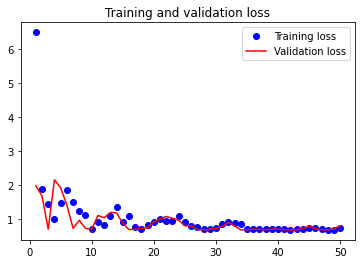

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline 

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [13]:
test_gen = Generator.flow_from_directory (r'C:\Users\ADMIN\Downloads\deeplearning\remote\test1', target_size=(64,64),
                                          batch_size=32,
                                          class_mode='binary')

Found 41 images belonging to 1 classes.


In [14]:
score = model.evaluate(test_gen, verbose=0)
print(f'Test loss: {score[0]:.3f}')
print(f'Test accuracy: {score[1]:.3f}')

Test loss: 1.278
Test accuracy: 0.000


In [15]:
import numpy as np

x_tests, y_tests = [], []
for i in range(len(test_gen)):
  x_test, y_test = next(test_gen)
  x_tests.append(x_test)
  y_tests.append(y_test)

x_test = np.concatenate(x_tests, axis=0)
y_test = np.concatenate(y_tests, axis=0)

print(x_test.shape)
print(y_test.shape)

(41, 64, 64, 3)
(41,)


In [16]:
pred = model.predict(x_test[:25000])

print(pred)
# for i in range(4):
#    plt.imshow(x_test[i])
#    plt.title(pred[i])
#    plt.show()

2/2 [==============================] - 0s 4ms/step
[[0.6331751 ]
 [0.73471403]
 [0.6799528 ]
 [0.70336825]
 [0.7115574 ]
 [0.6792506 ]
 [0.75535583]
 [0.74963605]
 [0.7751286 ]
 [0.59785765]
 [0.7375455 ]
 [0.6561354 ]
 [0.7083588 ]
 [0.7385883 ]
 [0.7107887 ]
 [0.59487075]
 [0.77613384]
 [0.74553794]
 [0.66307414]
 [0.7750774 ]
 [0.71252763]
 [0.7745672 ]
 [0.77777445]
 [0.707137  ]
 [0.7083385 ]
 [0.7566766 ]
 [0.7610536 ]
 [0.6568978 ]
 [0.74137646]
 [0.6964509 ]
 [0.7285383 ]
 [0.69051284]
 [0.78242636]
 [0.59351546]
 [0.7914725 ]
 [0.77152926]
 [0.7736235 ]
 [0.7161721 ]
 [0.7917622 ]
 [0.5990713 ]
 [0.7077116 ]]


In [22]:
ex63 = pd.DataFrame(pred)

In [23]:
print(ex63)

           0
0   0.633175
1   0.734714
2   0.679953
3   0.703368
4   0.711557
5   0.679251
6   0.755356
7   0.749636
8   0.775129
9   0.597858
10  0.737545
11  0.656135
12  0.708359
13  0.738588
14  0.710789
15  0.594871
16  0.776134
17  0.745538
18  0.663074
19  0.775077
20  0.712528
21  0.774567
22  0.777774
23  0.707137
24  0.708338
25  0.756677
26  0.761054
27  0.656898
28  0.741376
29  0.696451
30  0.728538
31  0.690513
32  0.782426
33  0.593515
34  0.791472
35  0.771529
36  0.773624
37  0.716172
38  0.791762
39  0.599071
40  0.707712


In [24]:
ex63.to_excel(excel_writer=r'C:\Users\ADMIN\Downloads\deeplearning\remote\test1-remote-220916-ver1.xlsx')


In [20]:
train_gen.class_indices

{'defective': 0, 'non-defective': 1}

종료 입니다

아래는 테스트 라 신경쓰지 마십시요

In [9]:
model.save(r"C:\Users\ADMIN\Downloads\deeplearning\remote\converted_keras-remote\my_model-220916-remote-ver1.h5")

model load

In [1]:
from keras.models import load_model
from PIL import Image, ImageOps
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
from keras.preprocessing.image import ImageDataGenerator

In [7]:
Generator = ImageDataGenerator(rescale=1/255.)


In [14]:
train_gen = Generator.flow_from_directory(r'C:\Users\ADMIN\Downloads\deeplearning\python_catdog\train\train', target_size=(64,64),
                                          batch_size=32,
                                          class_mode='binary')

val_gen = Generator.flow_from_directory(r'C:\Users\ADMIN\Downloads\deeplearning\python_catdog\validation\validation', target_size=(64,64),
                                          batch_size=32,
                                          class_mode='binary')

Found 25000 images belonging to 2 classes.
Found 25000 images belonging to 2 classes.


In [2]:
model = load_model(r'C:\Users\ADMIN\Downloads\deeplearning\python_catdog\train\train\my_model-220914-ver1.h5')


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline 

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

NameError: name 'history' is not defined

In [48]:
test_gen = Generator.flow_from_directory (r'C:\Users\ADMIN\Downloads\deeplearning\python_catdog\train2', target_size=(64,64),
                                          batch_size=32,
                                          class_mode='binary')

Found 25000 images belonging to 1 classes.


In [49]:
score = model.evaluate(test_gen, verbose=0)
print(f'Test loss: {score[0]:.3f}')
print(f'Test accuracy: {score[1]:.3f}')

Test loss: 0.663
Test accuracy: 0.468


In [50]:
import numpy as np

x_tests, y_tests = [], []
for i in range(len(test_gen)):
  x_test, y_test = next(test_gen)
  x_tests.append(x_test)
  y_tests.append(y_test)

x_test = np.concatenate(x_tests, axis=0)
y_test = np.concatenate(y_tests, axis=0)

print(x_test.shape)
print(y_test.shape)

(25000, 64, 64, 3)
(25000,)


In [51]:
pred = model.predict(x_test[:25000])

print(pred)
# for i in range(4):
#    plt.imshow(x_test[i])
#    plt.title(pred[i])
#    plt.show()

782/782 [==============================] - 4s 4ms/step
[[0.46062708]
 [0.5283422 ]
 [0.4777398 ]
 ...
 [0.5283422 ]
 [0.49070233]
 [0.37914506]]


In [52]:
ex63 = pd.DataFrame(pred)

In [53]:
print(ex63)

              0
0      0.460627
1      0.528342
2      0.477740
3      0.528342
4      0.528342
...         ...
24995  0.450377
24996  0.463795
24997  0.528342
24998  0.490702
24999  0.379145

[25000 rows x 1 columns]


In [54]:
ex63.to_excel(excel_writer=r'C:\Users\ADMIN\Downloads\deeplearning\python_catdog\test1-220915-ver2.xlsx')


In [44]:
train_gen.class_indices

{'cats': 0, 'dogs': 1}

In [33]:
import glob
fileList = glob.glob('C:/Users/ADMIN/Downloads/deeplearning/python_catdog/test1')
print(fileList)

['C:/Users/ADMIN/Downloads/deeplearning/python_catdog/test1']


In [34]:
import glob
fileList = glob.glob('C:/Users/ADMIN/Downloads/deeplearning/python_catdog/test1')

results = []

for file_path in fileList:
    results.append(file_path)

ex51 = pd.DataFrame(results)
ex52 = pd.DataFrame(fileList)   

In [35]:
print.head(ex51)

AttributeError: 'builtin_function_or_method' object has no attribute 'head'

In [37]:
print(ex51)

                                                   0
0  C:/Users/ADMIN/Downloads/deeplearning/python_c...


In [38]:
print(ex52)

                                                   0
0  C:/Users/ADMIN/Downloads/deeplearning/python_c...


In [41]:
ex61 = pd.DataFrame(x_tests)

C:\Users\ADMIN\anaconda3\lib\site-packages\pandas\core\internals\construction.py:576: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


In [39]:
print(x_test)

[[[[0.42352945 0.427451   0.35686275]
   [0.36862746 0.37254903 0.3019608 ]
   [0.41176474 0.4156863  0.34509805]
   ...
   [0.10196079 0.07843138 0.03137255]
   [0.06666667 0.03137255 0.00392157]
   [0.04313726 0.0509804  0.        ]]

  [[0.47450984 0.4784314  0.40784317]
   [0.49803925 0.5019608  0.43137258]
   [0.4784314  0.48235297 0.41176474]
   ...
   [0.1254902  0.07450981 0.03921569]
   [0.09803922 0.0627451  0.03529412]
   [0.04705883 0.04313726 0.03529412]]

  [[0.48235297 0.48627454 0.4156863 ]
   [0.47450984 0.4784314  0.40784317]
   [0.4784314  0.48235297 0.41176474]
   ...
   [0.10980393 0.04313726 0.01176471]
   [0.11764707 0.08235294 0.05490196]
   [0.0509804  0.03137255 0.01568628]]

  ...

  [[0.37647063 0.38431376 0.34117648]
   [0.37254903 0.3803922  0.3372549 ]
   [0.38431376 0.38431376 0.34509805]
   ...
   [0.07843138 0.08235294 0.0627451 ]
   [0.34901962 0.3529412  0.33333334]
   [0.37647063 0.36078432 0.3254902 ]]

  [[0.37647063 0.38431376 0.34117648]
   [0.3

In [29]:
img_path = 'C:/Users/ADMIN/Downloads/deeplearning/python_catdog/test1'

In [30]:
def infer(img_path:str):
    # Create the array of the right shape to feed into the keras model
    # The 'length' or number of images you can put into the array is
    # determined by the first position in the shape tuple, in this case 1.
    data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
    # Replace this with the path to your image
    image = Image.open(img_path)
    #resize the image to a 224x224 with the same strategy as in TM2:
    #resizing the image to be at least 224x224 and then cropping from the center
    size = (224, 224)
    image = ImageOps.fit(image, size, Image.ANTIALIAS)

    #turn the image into a numpy array
    image_array = np.asarray(image)
    # Normalize the image
    normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
    # Load the image into the array
    data[0] = normalized_image_array

    # run the inference
    prediction = model.predict(data)
    
    return prediction[0]

In [32]:
import glob
fileList = glob.glob('C:/Users/ADMIN/Downloads/deeplearning/python_catdog/test1')

results = []

for file_path in fileList:
    results.append(infer(file_path))

ex51 = pd.DataFrame(results)
ex52 = pd.DataFrame(fileList)   

PermissionError: [Errno 13] Permission denied: 'C:/Users/ADMIN/Downloads/deeplearning/python_catdog/test1'